# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [24]:
# 1. Читаем файл
try:
    df = pd.read_csv('../data/dayofweek.csv')
except FileNotFoundError as e:
    print("File not found")
    raise e

print(f"Размер данных: {df.shape}")

Размер данных: (1686, 44)


In [25]:
# Подготовка X и y
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

# print(f"\nРаспределение классов в полном фрейме:")
# print(y.value_counts().sort_index())

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)

print("Не используем  стратификацию (stratify):")
print(f"Train размер: {X_train.shape}")
print(f"Test размер: {X_test.shape}")

Не используем  стратификацию (stratify):
Train размер: (1348, 43)
Test размер: (338, 43)


In [27]:
# Проверяем распределение классов
print(f"\nРаспределение в Train:")
y_train.value_counts(normalize=True).sort_index()

print(f"\nРаспределение в Test:")
y_test.value_counts(normalize=True).sort_index()


Распределение в Train:

Распределение в Test:


0    0.091716
1    0.153846
2    0.071006
3    0.245562
4    0.071006
5    0.162722
6    0.204142
Name: dayofweek, dtype: float64

In [28]:
# 4. Train/test split С stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

print("Используем стратификацию")
print(f"Train размер: {X_train.shape}")
print(f"Test размер: {X_test.shape}")

print(f"\nРаспределение в Train:")
print(y_train.value_counts(normalize=True).sort_index() * 100)

print(f"\nРаспределение в Test:")
print(y_test.value_counts(normalize=True).sort_index() * 100)

Используем стратификацию
Train размер: (1348, 43)
Test размер: (338, 43)

Распределение в Train:
0     8.086053
1    16.246291
2     8.827893
3    23.442136
4     6.157270
5    16.097923
6    21.142433
Name: dayofweek, dtype: float64

Распределение в Test:
0     7.988166
1    16.272189
2     8.875740
3    23.668639
4     6.213018
5    15.976331
6    21.005917
Name: dayofweek, dtype: float64


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [29]:
logreg = LogisticRegression(random_state=21, fit_intercept=False, max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

# Оценка на train и test
train_acc_logreg = logreg.score(X_train, y_train)
test_acc_logreg = logreg.score(X_test, y_test)

print(f"\nLogistic Regression:")
print(f"Train Accuracy: {train_acc_logreg:.4f}")
print(f"Test Accuracy: {test_acc_logreg:.4f}")
print(f"Разница (переобучение): {train_acc_logreg - test_acc_logreg:.4f}")



Logistic Regression:
Train Accuracy: 0.6447
Test Accuracy: 0.6272
Разница (переобучение): 0.0174


In [30]:
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Overfitting': []
}

results['Model'].append('Logistic Regression')
results['Train Accuracy'].append(train_acc_logreg)
results['Test Accuracy'].append(test_acc_logreg)
results['Overfitting'].append(train_acc_logreg - test_acc_logreg)

### b. SVM

In [31]:
svm = SVC(kernel='linear', probability=True, random_state=21)
svm.fit(X_train, y_train)

train_acc_svm = svm.score(X_train, y_train)
test_acc_svm = svm.score(X_test, y_test)

print(f"\nSVM (linear):")
print(f"Train Accuracy: {train_acc_svm:.4f}")
print(f"Test Accuracy: {test_acc_svm:.4f}")
print(f"Разница (переобучение): {train_acc_svm - test_acc_svm:.4f}")

results['Model'].append('SVM (linear)')
results['Train Accuracy'].append(train_acc_svm)
results['Test Accuracy'].append(test_acc_svm)
results['Overfitting'].append(train_acc_svm - test_acc_svm)


SVM (linear):
Train Accuracy: 0.6892
Test Accuracy: 0.7160
Разница (переобучение): -0.0268


### c. Decision tree

In [32]:
dt = DecisionTreeClassifier(max_depth=4, random_state=21)
dt.fit(X_train, y_train)

train_acc_dt = dt.score(X_train, y_train)
test_acc_dt = dt.score(X_test, y_test)

print(f"\nDecision Tree (max_depth=4):")
print(f"Train Accuracy: {train_acc_dt}")
print(f"Test Accuracy: {test_acc_dt:.4f}")
print(f"Разница (переобучение): {train_acc_dt - test_acc_dt:.4f}")

results['Model'].append('Decision Tree')
results['Train Accuracy'].append(train_acc_dt)
results['Test Accuracy'].append(test_acc_dt)
results['Overfitting'].append(train_acc_dt - test_acc_dt)


Decision Tree (max_depth=4):
Train Accuracy: 0.5326409495548962
Test Accuracy: 0.5296
Разница (переобучение): 0.0031


### d. Random forest

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf.fit(X_train, y_train)

train_acc_rf = rf.score(X_train, y_train)
test_acc_rf = rf.score(X_test, y_test)

print(f"\nRandom Forest:")
print(f"Train Accuracy: {train_acc_rf:.4f}")
print(f"Test Accuracy: {test_acc_rf}")
print(f"Разница (переобучение): {train_acc_rf - test_acc_rf:.4f}")

results['Model'].append('Random Forest')
results['Train Accuracy'].append(train_acc_rf)
results['Test Accuracy'].append(test_acc_rf)
results['Overfitting'].append(train_acc_rf - test_acc_rf)


Random Forest:
Train Accuracy: 1.0000
Test Accuracy: 0.9319526627218935
Разница (переобучение): 0.0680


In [34]:
results_df = pd.DataFrame(results)
max_overfit_idx = results_df['Overfitting'].idxmax()
max_overfit_model = results_df.loc[max_overfit_idx, 'Model']

print("Результаты:")
print(results_df)
print(f"\nМодель с наибольшим переобучением: {max_overfit_model}")
print(f"Разница между train и test: {results_df.loc[max_overfit_idx, 'Overfitting']:.4f}")

Результаты:
                 Model  Train Accuracy  Test Accuracy  Overfitting
0  Logistic Regression        0.644659       0.627219     0.017440
1         SVM (linear)        0.689169       0.715976    -0.026807
2        Decision Tree        0.532641       0.529586     0.003055
3        Random Forest        1.000000       0.931953     0.068047

Модель с наибольшим переобучением: Random Forest
Разница между train и test: 0.0680


## Модель с наибольшей разницей между train и test данными Random forest: со значением 0.0680 т.е. "c"

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [35]:
logreg_cv = LogisticRegression(random_state=21, fit_intercept=False,
                                max_iter=1000, solver='lbfgs')
scores_logreg = cross_val_score(logreg_cv, X_train, y_train, cv=10, scoring='accuracy')

print(f"\nLogistic Regression CV:")
print(f"Mean accuracy: {scores_logreg.mean():.4f}")
print(f"Std deviation: {scores_logreg.std():.4f}")


Logistic Regression CV:
Mean accuracy: 0.6016
Std deviation: 0.0294


### b. SVM

In [36]:
svm_cv = SVC(kernel='linear', random_state=21)
scores_svm = cross_val_score(svm_cv, X_train, y_train, cv=10, scoring='accuracy')

print(f"\nSVM (linear) CV:")
print(f"Mean accuracy: {scores_svm.mean():.4f}")
print(f"Std deviation: {scores_svm.std():.4f}")


SVM (linear) CV:
Mean accuracy: 0.6587
Std deviation: 0.0436


### c. Decision tree

In [37]:
dt_cv = DecisionTreeClassifier(max_depth=4, random_state=21)
scores_dt = cross_val_score(dt_cv, X_train, y_train, cv=10, scoring='accuracy')

print(f"\nDecision Tree CV:")
print(f"Mean accuracy: {scores_dt.mean():.4f}")
print(f"Std deviation: {scores_dt.std():.4f}")


Decision Tree CV:
Mean accuracy: 0.5089
Std deviation: 0.0319


### d. Random forest

In [38]:
rf_cv = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
scores_rf = cross_val_score(rf_cv, X_train, y_train, cv=10, scoring='accuracy')

print(f"\nRandom Forest CV:")
print(f"Mean accuracy: {scores_rf.mean():.4f}")
print(f"Std deviation: {scores_rf.std():.4f}")


Random Forest CV:
Mean accuracy: 0.9117
Std deviation: 0.0174


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [39]:
cv_results = {
    'Logistic Regression': (scores_logreg.mean(), scores_logreg.std()),
    'SVM (linear)': (scores_svm.mean(), scores_svm.std()),
    'Decision Tree': (scores_dt.mean(), scores_dt.std()),
    'Random Forest': (scores_rf.mean(), scores_rf.std())
}

In [40]:
best_model_name = max(cv_results.keys(), key=lambda k: cv_results[k][0])
print(f"Лучшая модель по CV: {best_model_name}")
print(f"CV accuracy: {cv_results[best_model_name][0]:.4f} +- {cv_results[best_model_name][1]:.4f}")


Лучшая модель по CV: Random Forest
CV accuracy: 0.9117 +- 0.0174


In [41]:
param_combinations = [
    {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5},
    {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 2},
    {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 5},
    {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 2},
    {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5},
]

best_score = 0
best_params = {}

for params in param_combinations:
    model = RandomForestClassifier(random_state=21, **params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()

    print(f"Params: {params}")
    print(f"CV Score: {mean_score:.4f}")

    if mean_score > best_score:
        best_score = mean_score
        best_params = params

print(f"\nЛучшие параметры: {best_params}")
print(f"Лучший CV score: {best_score:.4f}")

Params: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5}
CV Score: 0.7915
Params: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 2}
CV Score: 0.8813
Params: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 5}
CV Score: 0.8857
Params: {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 2}
CV Score: 0.8842
Params: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}
CV Score: 0.7893

Лучшие параметры: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 5}
Лучший CV score: 0.8857


In [42]:
final_model = RandomForestClassifier(random_state=21, **best_params)
final_model.fit(X_train, y_train)

# Финальная оценка
final_test_accuracy = final_model.score(X_test, y_test)
print(f"\nФинальная точность на тесте: {final_test_accuracy:.4f}")


Финальная точность на тесте: 0.9172


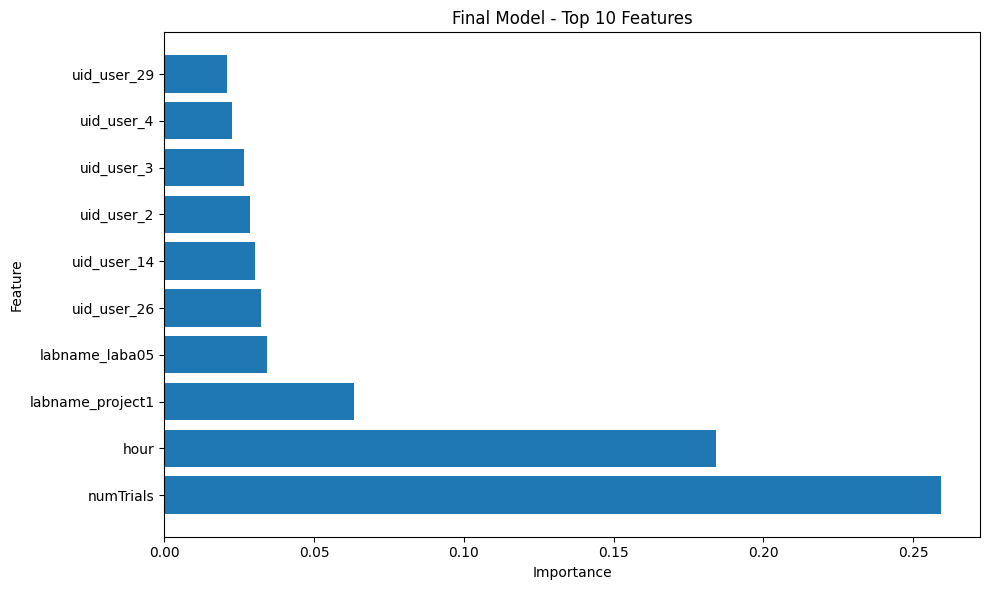

In [43]:
# Получение названий признаков
feature_names = X.columns.tolist()

# Создание DataFrame с важностями признаков
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': final_model.feature_importances_
})

# Выбор топ-10 наиболее важных признаков
top_n = 10
top_features = importance_df.nlargest(top_n, 'importance')

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Final Model - Top 10 Features")
plt.tight_layout()
plt.show()


In [44]:
try :
    model_filename = 'dayofweek_final_model.pkl'
    joblib.dump(final_model, model_filename)
    print(f"\nМодель сохранена в файл: {model_filename}")
except FileNotFoundError as e:
    print(f"Cannot create file {model_filename}")
    raise e

# Загрузка и проверка
loaded_model = joblib.load(model_filename)
loaded_predictions = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_predictions)

print(f"\nПроверка загруженной модели:")
print(f"Точность составляет: {loaded_accuracy:.4f}")



Модель сохранена в файл: dayofweek_final_model.pkl

Проверка загруженной модели:
Точность составляет: 0.9172
